# **Lecture 6: Examples for logistical Regression**

## Two problems related to Logistical regression demonstrated
- Logistical classifier
- Logistical regression

## **Part I: logistic classification**

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

### 1.1, Import some data to play with

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

### 1.2, Create an instance of Logistic Regression Classifier and fit the data.

In [6]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)


LogisticRegression(C=100000.0)

### 1.3, Plot resluts

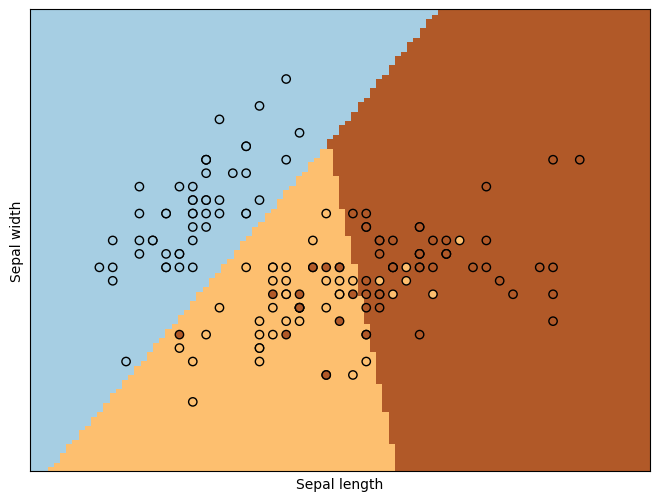

In [7]:
_, ax = plt.subplots(figsize=(8, 6))

DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()


## **Part II: logistic regression**

### 2.1, a simple explanation case: numbers connected to logistics

In [9]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future



import numpy as np

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T, Y))

# try it with our closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

# calculate the cross-entropy error
print(cross_entropy(T, Y))



19.33672738021736
0.048945750079555296


### 2.2, A bit more complex case use sklearn from scikit website


#### Multiclass sparse logistic regression on 20newgroups

Comparison of multinomial logistic L1 vs one-versus-rest L1 logistic regression
to classify documents from the newgroups20 dataset. Multinomial logistic
regression yields more accurate results and is faster to train on the larger
scale dataset.

Here we use the l1 sparsity that trims the weights of not informative
features to zero. This is good if the goal is to extract the strongly
discriminative vocabulary of each class. If the goal is to get the best
predictive accuracy, it is better to use the non sparsity-inducing l2 penalty
instead.

A more traditional (and possibly better) way to predict on a sparse subset of
input features would be to use univariate feature selection followed by a
traditional (l2-penalised) logistic regression model.


Dataset 20newsgroup, train_samples=4500, n_features=130107, n_classes=20
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 3
Test accuracy for model ovr: 0.5960
% non-zero coefficients for model ovr, per class:
 [0.26593496 0.43348936 0.26362917 0.31973683 0.37815029 0.2928359
 0.27054655 0.62717609 0.19522393 0.30897646 0.34586917 0.28207552
 0.34125758 0.29898468 0.34279478 0.59489497 0.38353048 0.35278655
 0.19829832 0.14603365]
Run time (3 epochs) for model ovr:1.12
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 2
[model=Multinomial, solver=saga] Number of epochs: 5
Test accuracy for model multinomial: 0.6440
% non-zero coefficients for model multinomial, per class:
 [0.36047253 0.1268187  0.10606655 0.17985197 0.5395559  0.07993421
 0.06686804 0.21443888 0.11528972 0.2075215  0.10914094 0.11144673
 0.1398848

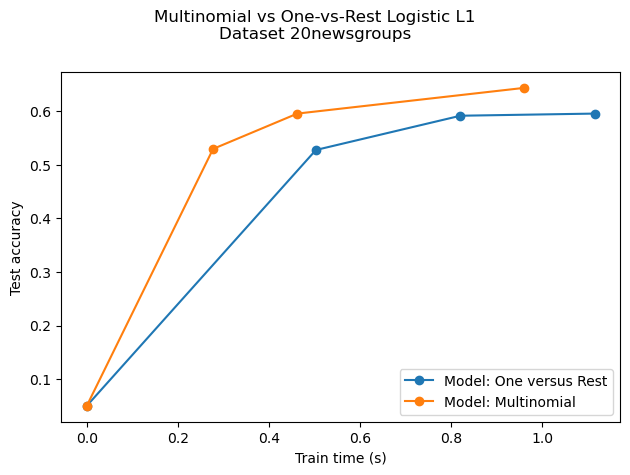

In [8]:
# Author: Arthur Mensch

import timeit
import warnings

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
t0 = timeit.default_timer()

# We use SAGA solver
solver = "saga"

# Turn down for faster run time
n_samples = 5000

X, y = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y, test_size=0.1
)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print(
    "Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i"
    % (train_samples, n_features, n_classes)
)

models = {
    "ovr": {"name": "One versus Rest", "iters": [1, 2, 3]},
    "multinomial": {"name": "Multinomial", "iters": [1, 2, 5]},
}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params["iters"]:
        print(
            "[model=%s, solver=%s] Number of epochs: %s"
            % (model_params["name"], solver, this_max_iter)
        )
        lr = LogisticRegression(
            solver=solver,
            multi_class=model,
            penalty="l1",
            max_iter=this_max_iter,
            random_state=42,
        )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]["times"] = times
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    print("Test accuracy for model %s: %.4f" % (model, accuracies[-1]))
    print(
        "%% non-zero coefficients for model %s, per class:\n %s"
        % (model, densities[-1])
    )
    print(
        "Run time (%i epochs) for model %s:%.2f"
        % (model_params["iters"][-1], model, times[-1])
    )

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]["name"]
    times = models[model]["times"]
    accuracies = models[model]["accuracies"]
    ax.plot(times, accuracies, marker="o", label="Model: %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("Test accuracy")
ax.legend()
fig.suptitle("Multinomial vs One-vs-Rest Logistic L1\nDataset %s" % "20newsgroups")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("Example run in %.3f s" % run_time)
plt.show()